<img src="../../share/skience2020_logo.png"
     alt="Markdown Monster icon"
     width="300"
     style="float: right; margin-right: 100px;" />
     
# Introduction to homogenization for wave propagation in complex media practical

##### Authors:
* Sneha Singh (CNRS, Univ Nantes)

* Yann Capdeville (CNRS, Univ Nantes)

---

## Introduction:
This practical is not extacly yet an introduction to homogenization for wave propagation in complex media, but
its objective is to show some numerical experiments that will be useful for the formal lecture that should come next.

The context here is wave propagation in a 1-D bar. The 1-D wave equation is:

$$\rho \partial_{tt} u - \partial_x\sigma  = f$$
$$\sigma = E \partial_x u$$ 

where
<ul>
<li> $u(x,t)$ : the displacement
<li> $\sigma(x,t)$ : the stress
<li> $f(x,t)$ : the external source force
<li> $\rho(x)$ : the density
<li> $E(x)$ : the elastic parameter
<li> $\partial_x$ : derivative with respect to $x$
</ul> 

The external source force $f(x,t)=\delta(x-x_0)g(t)$ is a point source located in $x_0$ and $g$ such it has a maximum frequency $f_{max}$.

The local wave speed is given by 
$$c(x)=\sqrt{\frac{E(x)}{\rho(x)}}$$

The minimum wavelength on the bar is bounded by 
$$\lambda_{min}=\frac{c_{min}}{f_{max}}$$
where $c_{min}$ is a lower bound for the wave velocity.

The practical is based fortran program solving the above wave equations using the spectral element method. It assumes absorbing boundary conditions (abc) at both ends of the bar. This program is in the "sem1d "directory and can be run separately from this notebook for more flexibility. But for the present practical, everything is done within the notebook.

## Step 1: configuration
Run the following two cells before moving forward.

In [1]:
# This is a configuration step for the exercise. Please run it before the simulation code! 
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
#run a bash command to compile the fortran program (if not done already) and re-direct output to /dev/null:
#!./compile.sh > /dev/null
dir=!pwd

In [2]:
def getdata(filename):
    data = open(filename,'r')
    lines = data.readlines()
    data.close()

    #initialize x and y
    x =[]
    y =[]

    #store the file form lines into appropriate variables
    for line in lines:
        p=line.split()
        x.append(float(p[0]))
        y.append(float(p[1]))

    #transform x and y into numpy arrays, to have more variability
    xv = np.array(x)
    yv = np.array(y)
    return{'xv':xv,'yv':yv}

## Step 2: generate a periodic elastic model
In this cell, a 1-D bar with periodic elastic properties is generated and visualized. The 1-D bar is 1 meter long. The bar is periodically heterogeneous, with a periodicity of $\ell=0.005m$. The two possible values for $\rho$ and $c$ are

<ul>
<li> $\rho_1=900 kgm^{-3}$ and $c_1=1336.31 ms^{-1}$
<li> $\rho_2=1100 kgm^{-3}$ and $c_2=1846.37 ms^{-1}$
</ul>

Note: changing these values cannot be done from the notebook. Nevertheless, you can edit the "practical/run/periodic_test/generate_model.awk" from a terminal.

/Users/korbinian/Google Drive/Notebooks/04_Thursday/Homogenization/run/periodic_test


<IPython.core.display.Javascript object>


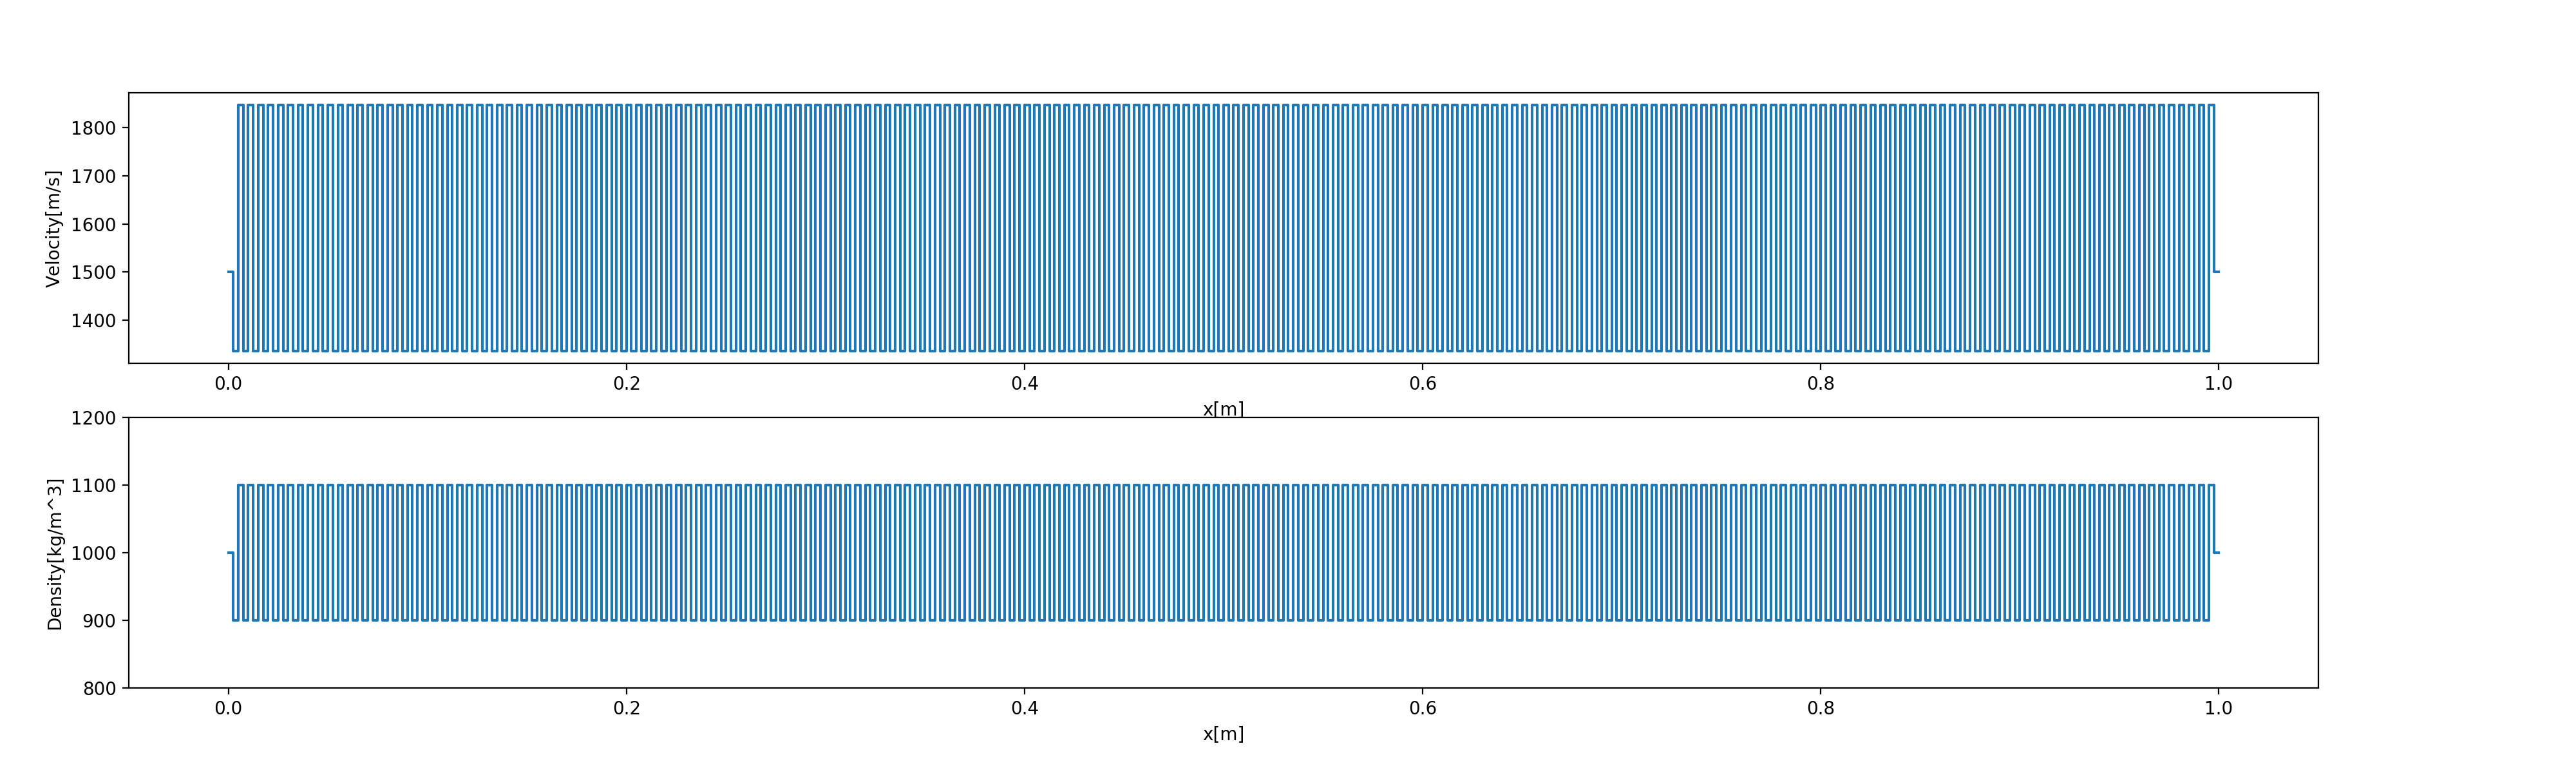

In [3]:
# Number of heterogeneity periodicity in the bar. (default is 200)

nparts=200

############### No change bellow #################################
%cd {dir[0]}/run/periodic_test
#the bash commands from ipython
!awk -v NN={nparts*2} -f  generate_model.awk > model.dat 

#make subplots for velocity and density
velocity_return = getdata('velocity')
x1 = velocity_return['xv']
velocity = velocity_return['yv']

density_return = getdata('density')
x2 = density_return['xv']
density = density_return['yv']

plt.figure(figsize=(20,6))
plt.subplots_adjust(left=0.05)

plt.subplot(211)
plt.plot(x1, velocity)
plt.ylabel('Velocity[m/s]')
plt.xlabel('x[m]')

plt.subplot(212)
plt.plot(x2, density)
plt.ylabel('Density[kg/m^3]')
plt.ylim([800,1200])
plt.xlabel('x[m]')

plt.show()

## Step 3: generate reference seismograms and snapshots

In the next cell, the spectral element program is run in the above periodic bar for a source located in $x_0=0.3m$.
This will generate the "reference" wavefield, noted $u^\varepsilon(x,t)$, where  $\varepsilon=\ell/\lambda_{min}$.
When $\varepsilon$ is small, it means that the heterogeneities are small compared to the wavelength.
Here $f_{max}\simeq 60kHz$, $\lambda_{min}\simeq 0.025m$ and therefore $\varepsilon\simeq 0.2$ 

Then 3 snapshots are plotted:

<ul>
<li> displacement: $u^\varepsilon(x,t)$ for $t=0.2ms$
<li> strain: $\partial_x u^\varepsilon(x,t)$ for $t=0.2ms$
<li> stress: $\sigma^\varepsilon(x,t)$ for $t=0.2ms$
</ul>

<IPython.core.display.Javascript object>


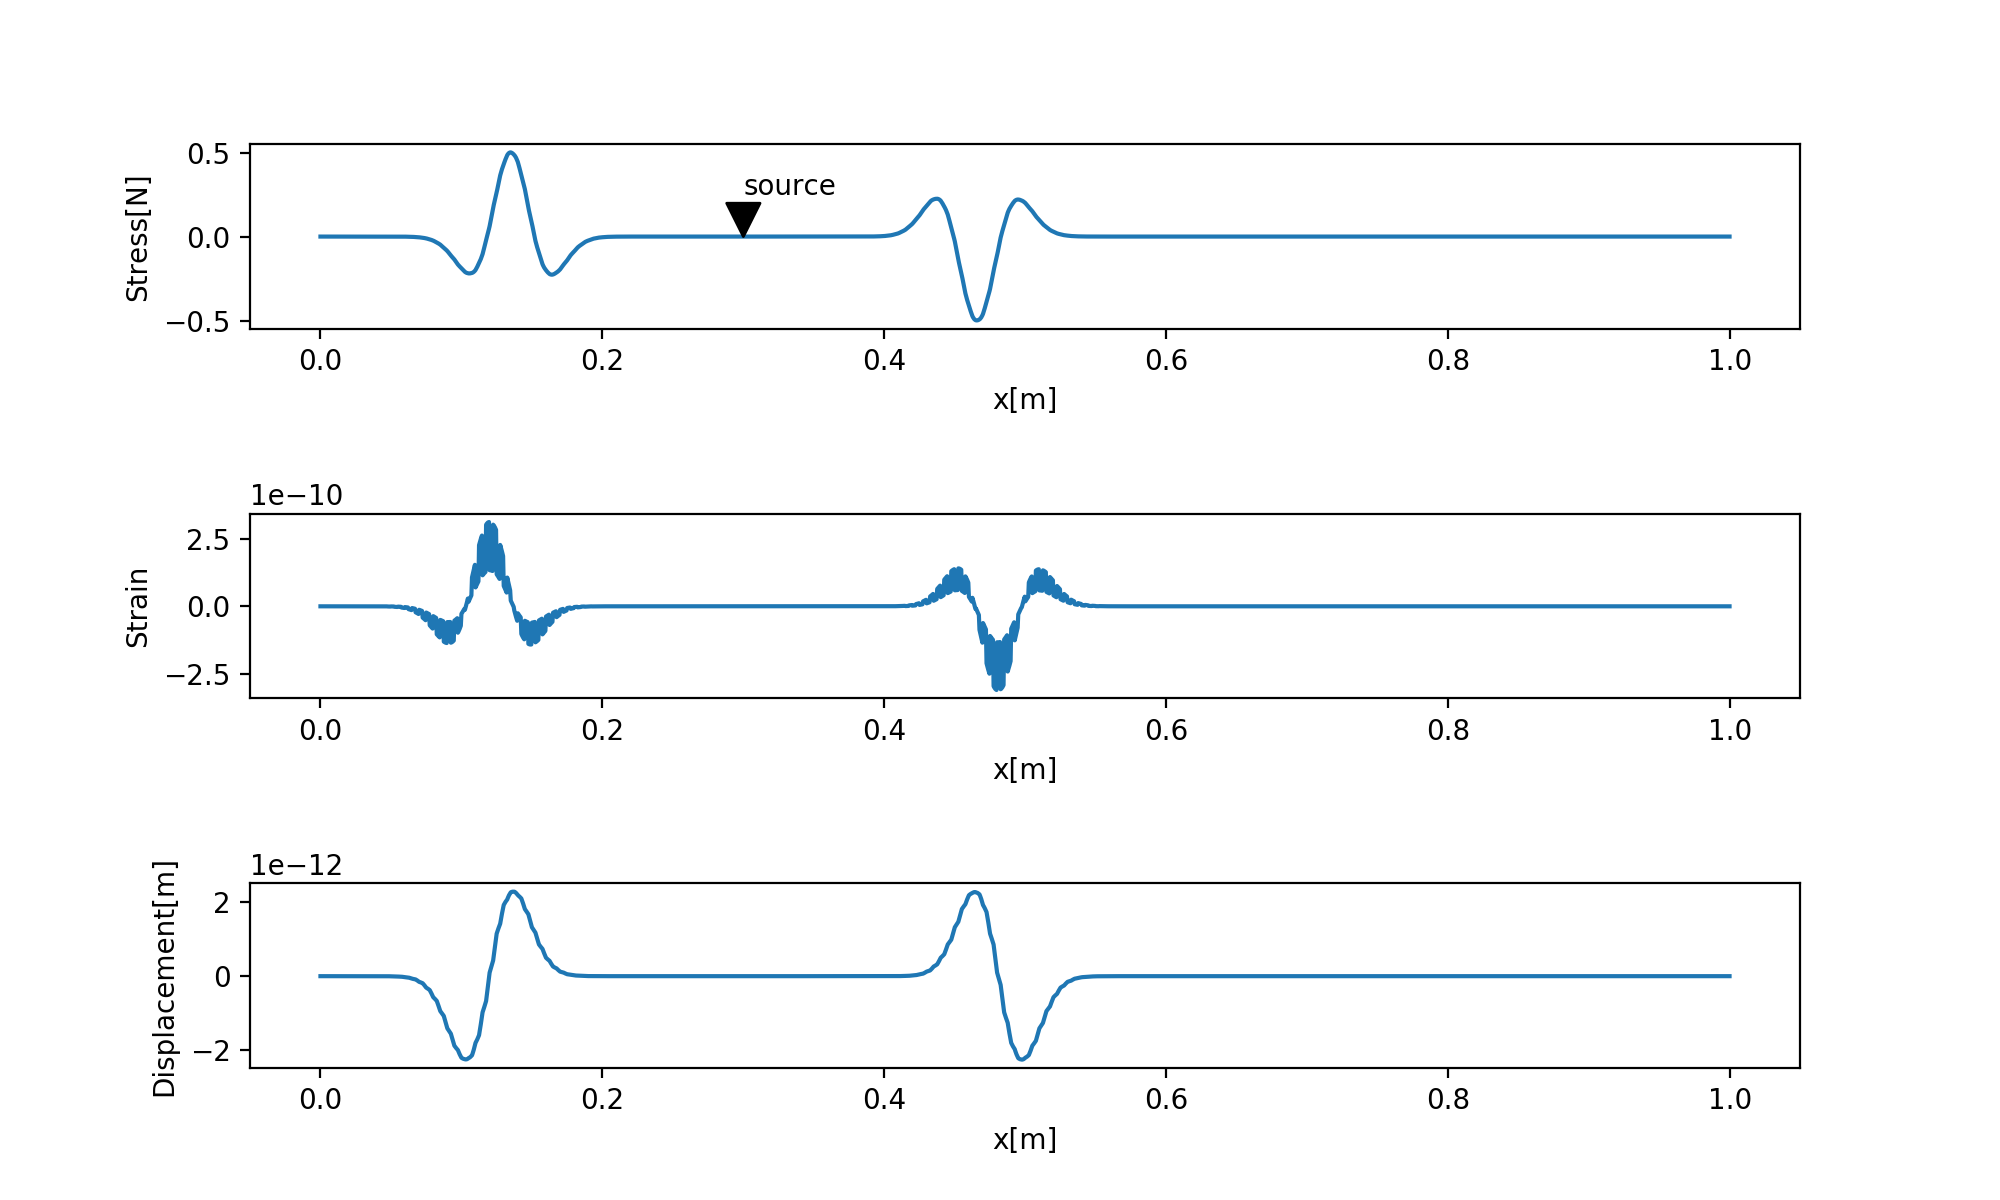

In [4]:
!../../sem1d/bin/sem1D > out

#make subplots for stress, strain and displacement
stress_return = getdata('snapshot_s019')
x3 = stress_return['xv']
stress = stress_return['yv']

strain_return = getdata('snapshot_e020')
x4 = strain_return['xv']
strain = strain_return['yv']

displacement_return = getdata('snapshot020')
x5 = displacement_return['xv']
displacement = displacement_return['yv']

fig = plt.figure(figsize=(10,6))
fig.subplots_adjust(hspace=.5)

plt.subplot(311)
plt.plot(x3, stress)
plt.annotate('source',xy=(0.3,0),xytext=(0.3,0.25),arrowprops=dict(facecolor='black',shrink=0.5),)
plt.ylabel('Stress[N]')
plt.xlabel('x[m]')

plt.subplot(312)
plt.plot(x4, strain)
plt.ylabel('Strain')
plt.xlabel('x[m]')
         
plt.subplot(313)
plt.plot(x5, displacement)
plt.ylabel('Displacement[m]')
plt.xlabel('x[m]')

plt.show()

### Conclusion:
Displacement and stress are smooth and continuous. This is not the case for strain.

The question is: can find a 1D homogeneous bar for which displacement and stress are the "same" as for the heterogeneous bar. 

## Step 4: Comparison with averaged models

Form the previous cell, we can see that, even if the elastic properties in the bar are heterogeneous, the wavefield looks like a wavefield propagating in a homogeneous bar (not for the strain).

Can we find homogeneous bar "effective" properties such that the "effective" displacement fits the reference displacement?

In the following cell, try different effective constant density and velocity in the bar. For this, run the cell and answer the prompt.

Here are some suggestions for the homogeneous properties:

<ul>
<li> Velocity average: 
$$\rho=\frac{1}{2}(\rho_1+\rho_2), c=\frac{1}{2}(c_1+c_2)$$
<li> Slowness average: 
$$\rho=\frac{1}{2}(\rho_1+\rho_2), c=\frac{2}{\frac{1}{c_1}+\frac{1}{c_2}}$$
<li> Elastic average: 
$$\rho=\frac{1}{2}(\rho_1+\rho_2), E=\frac{1}{2}(E_1+E_2); c=\sqrt{E/\rho}$$
<li> Elastic harmonic average: 
$$\rho=\frac{1}{2}(\rho_1+\rho_2), E=\frac{2}{\frac{1}{E_1}+\frac{1}{E_2}}; c=\sqrt{E/\rho}$$
</ul>

Which one works the best?

/Users/korbinian/Google Drive/Notebooks/04_Thursday/Homogenization/run/velocity_av_test
Please enter velocity 1000
Please enter density 1000


<IPython.core.display.Javascript object>


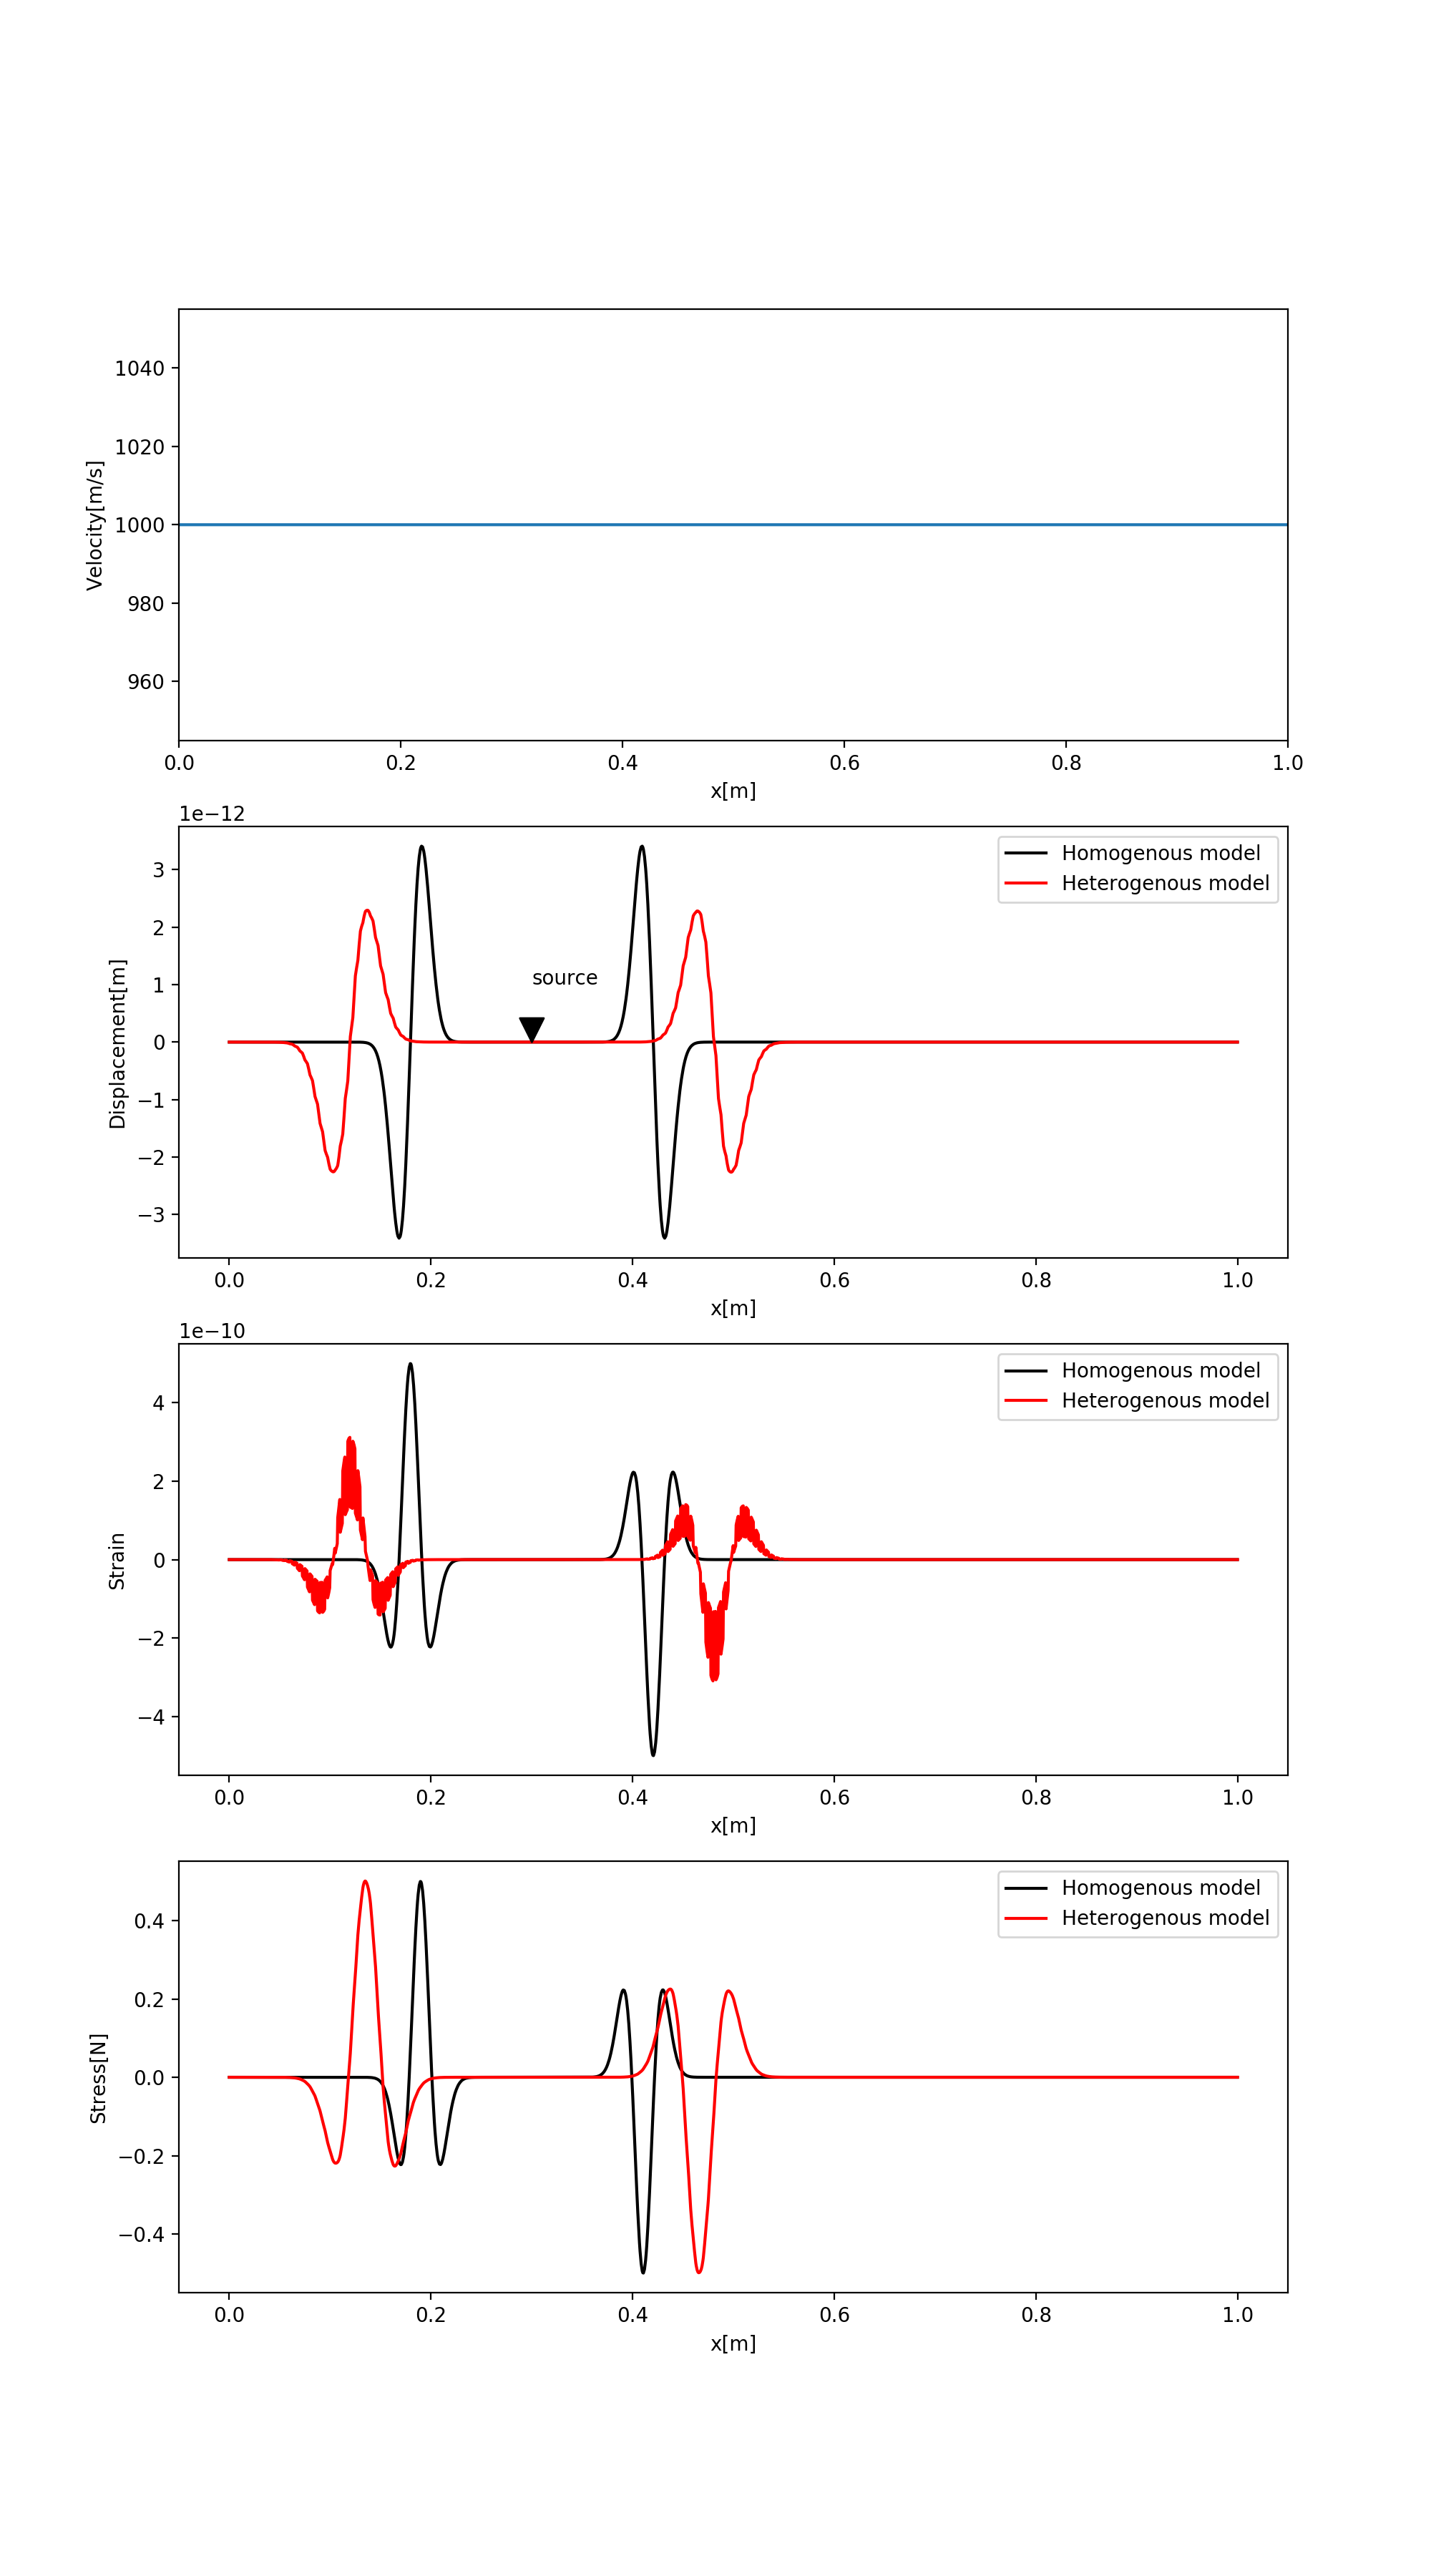

In [6]:
%cd {dir[0]}/run/velocity_av_test

inputvel = input('Please enter velocity ')
inputrho = input('Please enter density ')

with open('model.dat', 'r') as file:
    data = file.readlines()

line2 = '   0. ' + str(inputrho) + " " + str(inputvel) + '\n'
line3 = '1. ' + str(inputrho) + " " + str(inputvel) + '\n'

# now change the respective lines
data[2] = line2
data[3] = line3

# and write everything back
with open('model.dat', 'w') as file:
    file.writelines( data )
    
!../../sem1d/bin/sem1D > out

#make subplots for velocity, displacement and strain
velocity_return = getdata('velocity')
x6 = velocity_return['xv']
av_velocity = velocity_return['yv']

displacement_return = getdata('snapshot020')
x7 = displacement_return['xv']
av_displacement = displacement_return['yv']

strain_return = getdata('snapshot_e020')
x8 = strain_return['xv']
av_strain = strain_return['yv']

stress_return = getdata('snapshot_s019')
x9 = stress_return['xv']
av_stress = stress_return['yv']

plt.figure(figsize=(10,18))
fig.subplots_adjust(hspace=1.0)

plt.subplot(411)
plt.plot(x6, av_velocity)
plt.ylabel('Velocity[m/s]')
plt.xlabel('x[m]')
plt.xlim([0,1])

plt.subplot(412)
plt.plot(x7, av_displacement,'k', label='Homogenous model')
plt.plot(x5,displacement,'r',label='Heterogenous model')
plt.annotate('source',xy=(0.3,0),xytext=(0.3,1.e-12),arrowprops=dict(facecolor='black',shrink=0.5),)
plt.legend(loc='upper right')
plt.ylabel('Displacement[m]')
plt.xlabel('x[m]')

plt.subplot(413)
plt.plot(x8,av_strain,'k', label='Homogenous model')
plt.plot(x4,strain,'r',label='Heterogenous model')
plt.legend(loc='upper right')
plt.ylabel('Strain')
plt.xlabel('x[m]')

plt.subplot(414)
plt.plot(x9, av_stress,'k', label='Homogenous model')
plt.plot(x3,stress,'r',label='Heterogenous model')
plt.legend(loc='upper right')
plt.ylabel('Stress[N]')
plt.xlabel('x[m]')

plt.show()

### Conclusion:
For most values of velocity and density, the strain and stress fields do not match with the reference heterogeneous model. This is the case for example when the velocity is chosen to be as the velocity average (1591.34 m/s) and the density is chosen to be 1000 kg/m^3. In most of the cases (all?), the true model is slower than the average one.

For one choice however, for velocity of 1500 m/s and density of 1000 kg/m^3 (the harmonic elastic average), the displacement and the stress fields match. Neverthless, it is not good enough for stain which still needs to be fine scaled. 

## Step 5: Correctors: investigate the differences

We now stick the harmonic elastic average for the "effective" solution $u$.
We want to visualize how change the differences between the reference solutions $u^\varepsilon$, for two different $\varepsilon$ values, with resppect to the effective solution $u$ (which is independant of $\varepsilon$ because the averages do not change with $\varepsilon$)

To change the value of $\varepsilon$, we simply change the periodicity $\ell$. In the next cell, the "reference" solution is computed again for $\varepsilon=0.1$ ($\ell=0.0025m$)


/Users/korbinian/Google Drive/Notebooks/04_Thursday/Homogenization/run/periodic_test2


<IPython.core.display.Javascript object>


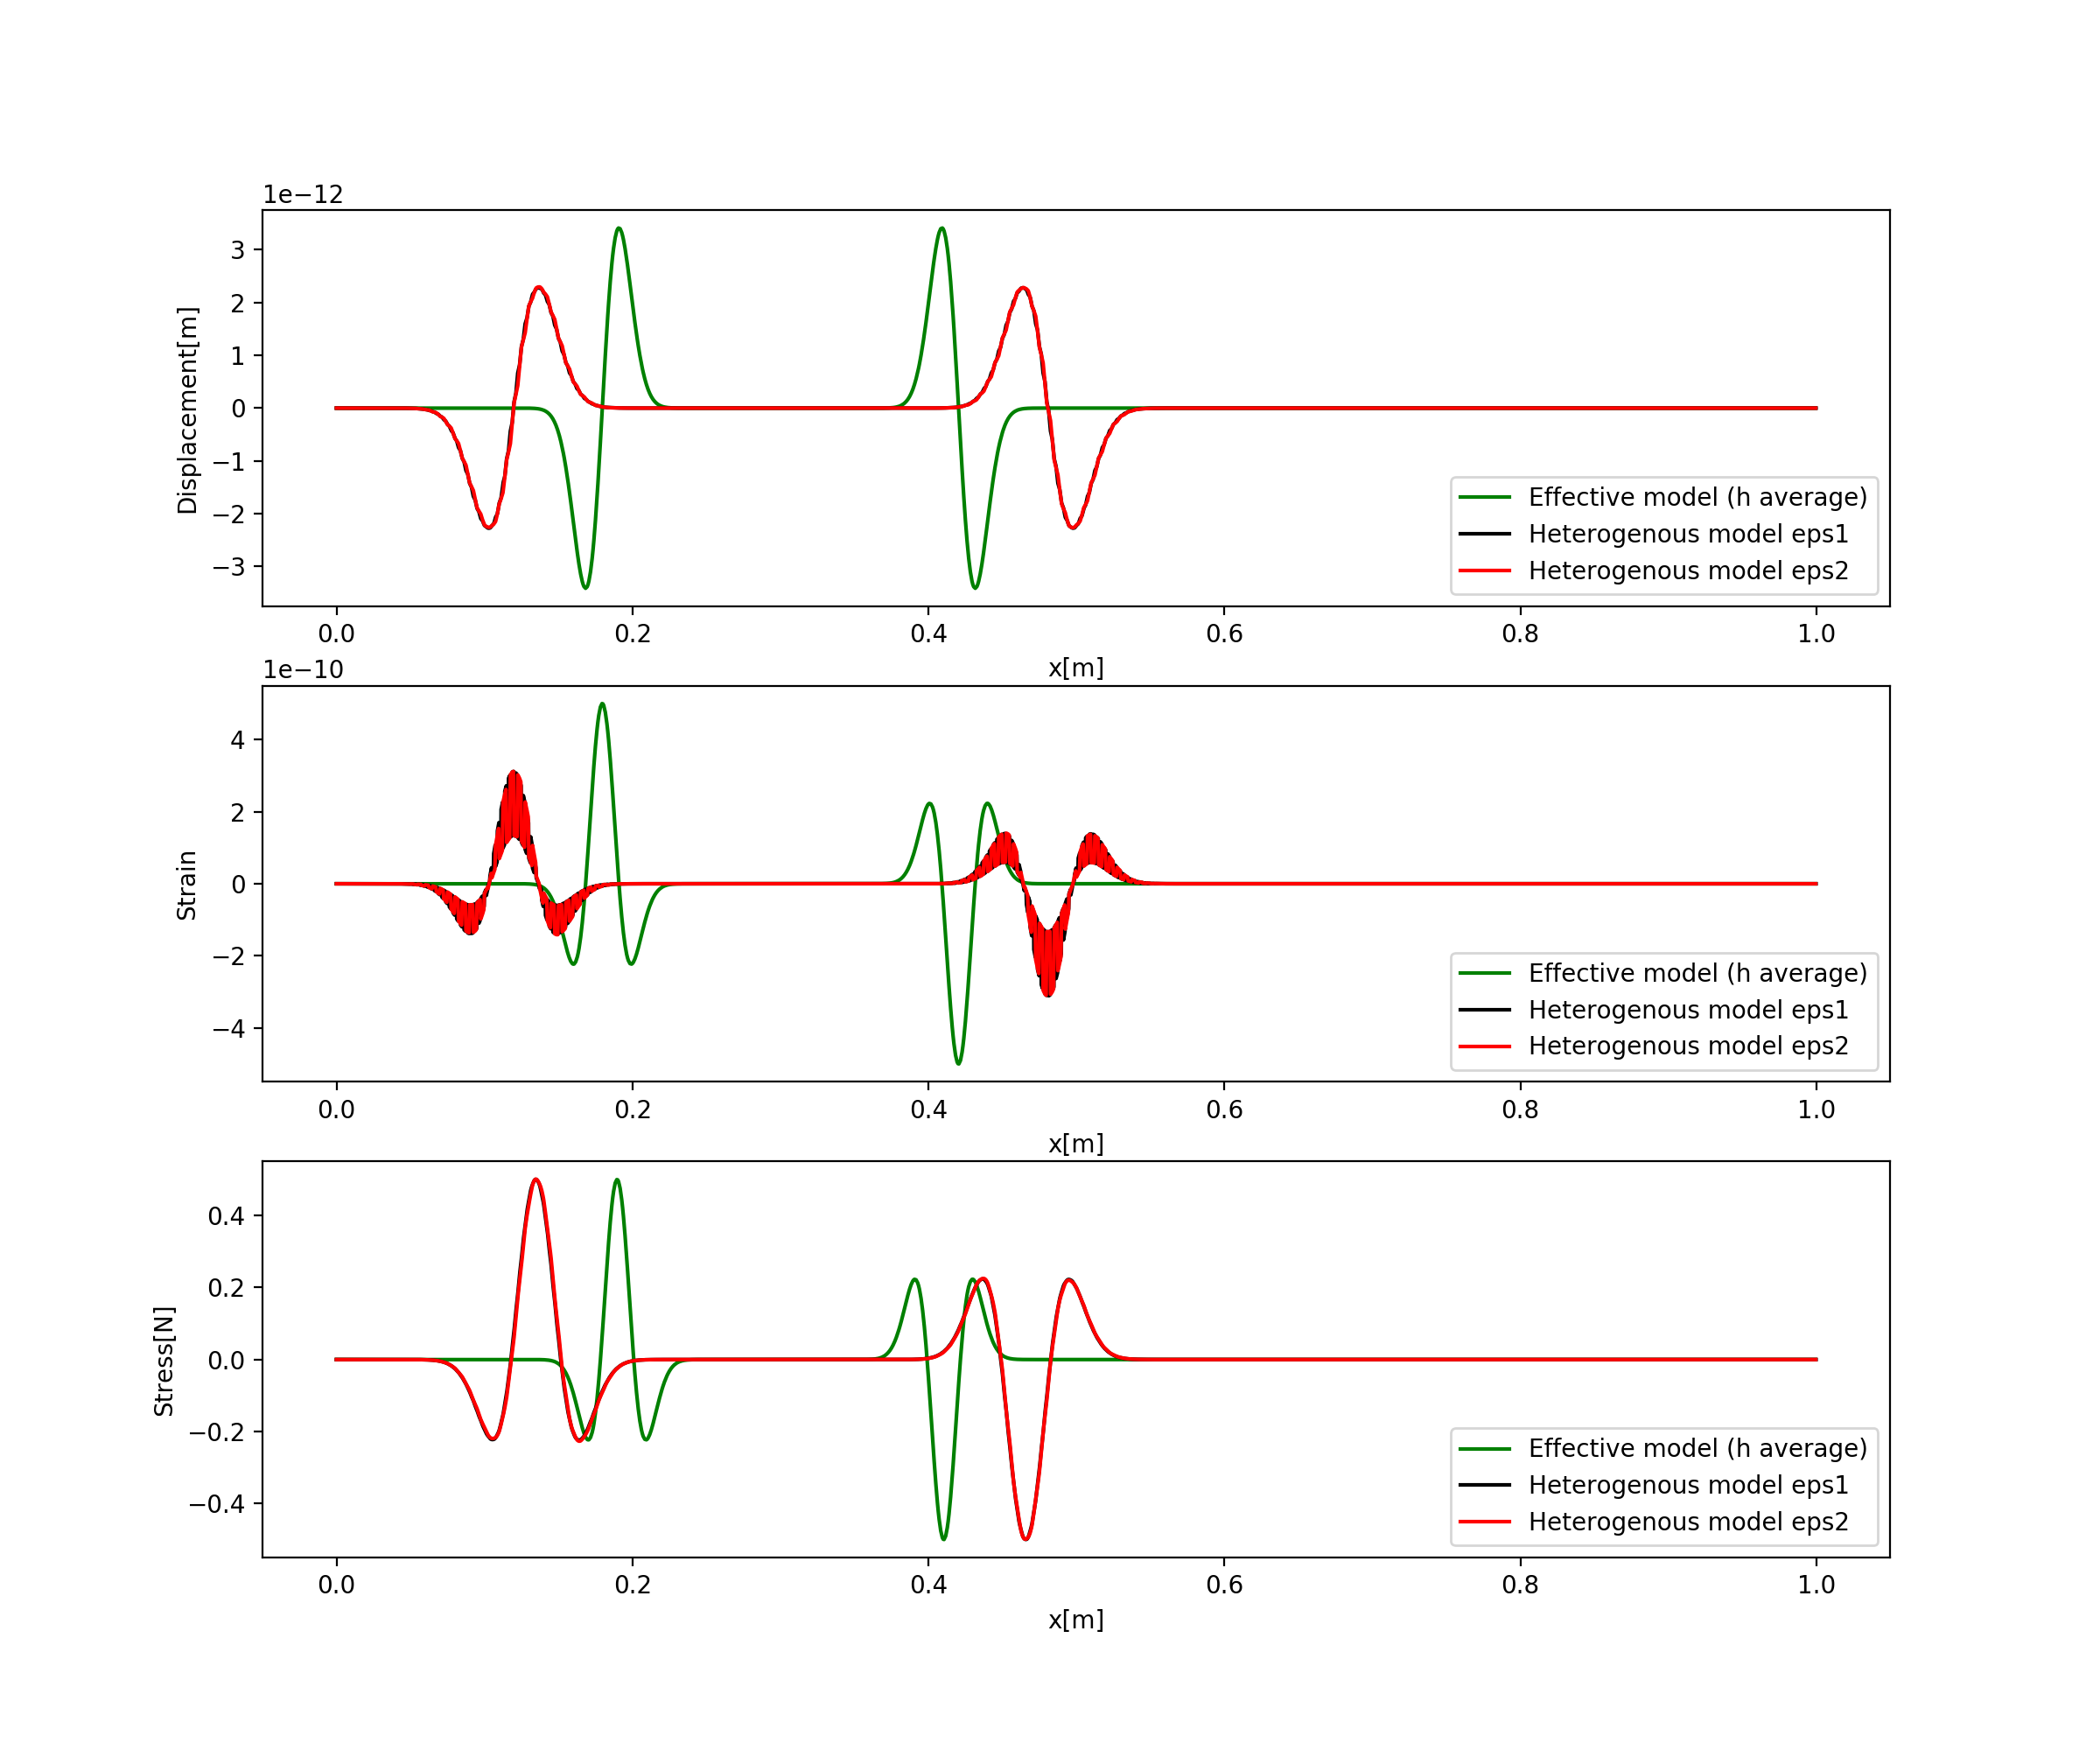

In [7]:
%cd {dir[0]}/run/periodic_test2
!awk -f generate_model.awk > model.dat 
!../../sem1d/bin/sem1D > out

#make subplots for displacement, stess and stain
displacement_return = getdata('snapshot020')
x17 = displacement_return['xv']
new_displacement = displacement_return['yv']

strain_return = getdata('snapshot_e020')
x18 = strain_return['xv']
new_strain = strain_return['yv']

stress_return = getdata('snapshot_s019')
x19 = stress_return['xv']
new_stress = stress_return['yv']

plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=1.0)

plt.subplot(311)
plt.plot(x7,av_displacement,'g', label='Effective model (h average)')
plt.plot(x17,new_displacement,'k', label='Heterogenous model eps1')
plt.plot(x5,displacement,'r',label='Heterogenous model eps2')
plt.legend(loc='lower right')
plt.ylabel('Displacement[m]')
plt.xlabel('x[m]')

plt.subplot(312)
plt.plot(x8,av_strain,'g', label='Effective model (h average)')
plt.plot(x18,new_strain,'k', label='Heterogenous model eps1')
plt.plot(x4,strain,'r',label='Heterogenous model eps2')
plt.legend(loc='lower right')
plt.ylabel('Strain')
plt.xlabel('x[m]')

plt.subplot(313)
plt.plot(x9, av_stress,'g', label='Effective model (h average)')
plt.plot(x19, new_stress,'k', label='Heterogenous model eps1')
plt.plot(x3,stress,'r',label='Heterogenous model eps2')
plt.legend(loc='lower right')
plt.ylabel('Stress[N]')
plt.xlabel('x[m]')

plt.show()

## Conclusions:

<ul>
<li> The amplitude of differences in the displacement  is changing  with $\varepsilon$ 
<li> The amplitude of differences in the strain is NOT changing  with $\varepsilon$ 
<li> For both strain and displacement, the spatial variations of the differences are changing with $\varepsilon$ 
</ul>

We will understand more of these differences with the notion of "correctors" during the lecture.
